I came across many challenges when doing this assignment; however, the experience provided a better understanding of data science and how the job world would be like. 

# **Challenges**

## Challenge 1:

### Problem:
I started by making a problem where Australian University researchers wanted to cluster neighborhoods in Canberra and Perth as this would help them in their research and decision-making for the next steps. The researchers' audience was their professor who assigned the research, and why this was important was because it counted towards their final degree grade. 

### Data:
The data was retrived from the following sources:
* The Matthew Proctor Database was used to get the Postcodes of Australia (http://www.matthewproctor.com/australian_postcodes). Since the poscodes of all of Austalia are not available in one file, the postcodes of Western Australia and New South Wales were taken (these are 2 states in Australia). Perth is in Western Australia and Canberra is in New South Wales. The features that can be extracted from this data are State, Postcode, and locality of postcode (usually a city or suburb)
* Postcodes in Western Australia (http://www.matthewproctor.com/full_australian_postcodes_wa). The featues taken were ID, Postcode, State, Longitude, Latitude, and Locality.
* Postcodes in New South Wales (http://www.matthewproctor.com/full_australian_postcodes_nsw). The featues taken were ID, Postcode, State, Longitude, Latitude, and Locality.
* Foursquare will help in exploring and clustering the neighborhoods in Perth and Canberra. The featues being used are the explore and seach functions which are linked to API.

### Data Cleaning:

I first started experimenting with the idea of transforming the data into a .csv file then began clearning the data. I noticed this was the long-way and I could have just made the data into a dataframe then began cleaning. This table needed a lot of cleaning. The column titles were part of the raw data so I first had to rename the column names from intergers to their real names. 



In [1]:
import requests
import pandas as pd

url = 'http://www.matthewproctor.com/full_australian_postcodes_wa'
html = requests.get(url).content
df_list = pd.read_html(html)
df = df_list[-1]
print(df)
df.to_csv('WA.csv')

         0         1                    2      3            4             5   \
0        ID  Postcode             Locality  State    Longitude      Latitude   
1       414      0872  GIBSON DESERT NORTH     WA   131.298809    -21.949513   
2     20143      0872  GIBSON DESERT SOUTH     WA  125.9841842  -24.94725917   
3     20156      0872          KIWIRRKURRA     WA   126.954107   -23.2807675   
4     20169      0872  NGAANYATJARRA-GILES     WA  128.1150802  -25.27073166   
...     ...       ...                  ...    ...          ...           ...   
1921  10412      6989           MADDINGTON     WA   116.009575    -32.039597   
1922  10413      6990             GOSNELLS     WA   116.008461    -32.060407   
1923  10414      6991            KELMSCOTT     WA   116.095955     -32.09788   
1924  10415      6992             ARMADALE     WA   115.920395    -31.964503   
1925  10416      6997         KELMSCOTT DC     WA   116.095955     -32.09788   

                     6                 

In [2]:
df = pd.read_csv('WA.csv')
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,ID,Postcode,Locality,State,Longitude,Latitude,Category,Type,SA3,SA3 Name,SA4,SA4 Name,Region,Status
1,1,414,0872,GIBSON DESERT NORTH,WA,131.298809,-21.949513,NaN,NaN,70202,Barkly,702,Northern Territory - Outback,R1,Updated 6-Feb-2020
2,2,20143,0872,GIBSON DESERT SOUTH,WA,125.9841842,-24.94725917,Delivery Area,Delivery Area,70202,Barkly,702,Northern Territory - Outback,R1,Updated 6-Feb-2020
3,3,20156,0872,KIWIRRKURRA,WA,126.954107,-23.2807675,Delivery Area,Delivery Area,70202,Barkly,702,Northern Territory - Outback,R1,Updated 6-Feb-2020
4,4,20169,0872,NGAANYATJARRA-GILES,WA,128.1150802,-25.27073166,Delivery Area,Delivery Area,70202,Barkly,702,Northern Territory - Outback,R1,Updated 6-Feb-2020


The column names do not have their names. Also, there are unnecessary columns that are not needed for the data analysis and visualization. These columns have been dropped. 

In [3]:
df.rename(
    columns={
        "Unnamed: 0": "Row NO",
        "0": "ID",
        "1": "Postcode",
        "2": "Locality",
        "3": "State",
        "4": "Longitude",
        "5": "Latitude",
        "6": "Category",
        "7": "Type",
        "8": "SA3",
        "9": "SA3Name",
        "10": "SA4",
        "11": "SA4 Name",
        "12": "Region",
        "13": "Status"
    },
    inplace=True
)
newdf = df.drop(["Row NO", "ID", "State", "Type", "Status", "SA4 Name", "SA4", "Region"], axis=1)
newdf.head()

,Postcode,Locality,Longitude,Latitude,Category,SA3,SA3Name
0,Postcode,Locality,Longitude,Latitude,Category,SA3,SA3 Name
1,0872,GIBSON DESERT NORTH,131.298809,-21.949513,NaN,70202,Barkly
2,0872,GIBSON DESERT SOUTH,125.9841842,-24.94725917,Delivery Area,70202,Barkly
3,0872,KIWIRRKURRA,126.954107,-23.2807675,Delivery Area,70202,Barkly
4,0872,NGAANYATJARRA-GILES,128.1150802,-25.27073166,Delivery Area,70202,Barkly


We can now drop the row called '0' because it is not needed (we have updated the column names). 


In [4]:
ndf = newdf.drop([0], axis=0)
ndf.head()

,Postcode,Locality,Longitude,Latitude,Category,SA3,SA3Name
1,0872,GIBSON DESERT NORTH,131.298809,-21.949513,NaN,70202,Barkly
2,0872,GIBSON DESERT SOUTH,125.9841842,-24.94725917,Delivery Area,70202,Barkly
3,0872,KIWIRRKURRA,126.954107,-23.2807675,Delivery Area,70202,Barkly
4,0872,NGAANYATJARRA-GILES,128.1150802,-25.27073166,Delivery Area,70202,Barkly
5,0872,PATJARR,131.6138326,-23.4686864,Delivery Area,70202,Barkly


There are NaN values in the data. Clearly, we cannot replace this with other values so we will just delete these rows. If there is any NaN value in any column, that row will be deleted.

In [5]:
nndf = ndf.dropna(how='any')    #to drop if any value in the row has a nan
nndf.head()

,Postcode,Locality,Longitude,Latitude,Category,SA3,SA3Name
2,0872,GIBSON DESERT SOUTH,125.9841842,-24.94725917,Delivery Area,70202,Barkly
3,0872,KIWIRRKURRA,126.954107,-23.2807675,Delivery Area,70202,Barkly
4,0872,NGAANYATJARRA-GILES,128.1150802,-25.27073166,Delivery Area,70202,Barkly
5,0872,PATJARR,131.6138326,-23.4686864,Delivery Area,70202,Barkly
6,0872,TJIRRKARLI,125.3466253,-25.9752687,Delivery Area,70202,Barkly


We can now see that before removing the NaN rows, the data had 1,926 rows. Now the data has 1,794 rows. 

Another thing to address is that the Locality column is uppercase and this should be lowercase. 

In [6]:
#nndf['lower_desc'] = map(lambda x: x.lower(), df['Locality'])

nndf = nndf.applymap(lambda s:s.lower() if type(s) == str else s)
print(nndf)

     Postcode             Locality    Longitude      Latitude  \
2        0872  gibson desert south  125.9841842  -24.94725917   
3        0872          kiwirrkurra   126.954107   -23.2807675   
4        0872  ngaanyatjarra-giles  128.1150802  -25.27073166   
5        0872              patjarr  131.6138326   -23.4686864   
6        0872           tjirrkarli  125.3466253   -25.9752687   
...       ...                  ...          ...           ...   
1917     6985           cloverdale   115.600155    -33.625285   
1920     6988             thornlie   115.964764    -32.050009   
1921     6989           maddington   116.009575    -32.039597   
1922     6990             gosnells   116.008461    -32.060407   
1924     6992             armadale   115.920395    -31.964503   

               Category    SA3    SA3Name  
2         delivery area  70202     barkly  
3         delivery area  70202     barkly  
4         delivery area  70202     barkly  
5         delivery area  70202     barkly  

In [147]:
nndf.head()

,Postcode,Locality,Longitude,Latitude,Category,SA3,SA3Name
2,0872,gibson desert south,125.9841842,-24.94725917,delivery area,70202,barkly
3,0872,kiwirrkurra,126.954107,-23.2807675,delivery area,70202,barkly
4,0872,ngaanyatjarra-giles,128.1150802,-25.27073166,delivery area,70202,barkly
5,0872,patjarr,131.6138326,-23.4686864,delivery area,70202,barkly
6,0872,tjirrkarli,125.3466253,-25.9752687,delivery area,70202,barkly


All columns are lowercase now.

### Data Processing & Visualization

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
# uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
# uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


In [8]:
address = 'Perth, WA'

geolocator = Nominatim(user_agent="australia_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Perth are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Perth are -31.9527121, 115.8604796.


In [9]:
# create map of Toronto using latitude and longitude values
map_perth = folium.Map(location=[latitude, longitude], zoom_start=10)

map_perth

In [11]:
# add markers to map
for lat, lng, locality, SA3Name in zip(nndf['Latitude'], nndf['Longitude'], nndf['Locality'], nndf['SA3Name']):
    label = '{}, {}'.format(SA3Name, locality)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_perth)  
    
map_perth

TypeError: must be real number, not str

This is when the error appeared. After a lot of trial and error and trying to understand the problem, I decided that something was wrong with the table I had extracted from the URL. My error message was something was wrong with the latitude cordinates; it kept saying there might be a NaN value but I manually checked for Nan values and there was not any. 

I decided to get a new URL and new data. I was right, there was an issue with the URL and the Austalian data. The Plymouth table worked perfectly and I managed to cluster the neighborhoods based on the postcodes and locations of empty houses in Plymouth, UK. However, this is when IBM Watson Studio created a unexpected error message. 

In [62]:
%matplotlib inline

In [63]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [78]:
img = mpimg.imread('IBM.PNG')
print(img)

[[[0.95686275 0.95686275 0.95686275 1.        ]
  [0.95686275 0.95686275 0.95686275 1.        ]
  [0.95686275 0.95686275 0.95686275 1.        ]
  ...
  [0.95686275 0.95686275 0.95686275 1.        ]
  [0.95686275 0.95686275 0.95686275 1.        ]
  [0.95686275 0.95686275 0.95686275 1.        ]]

 [[0.95686275 0.95686275 0.95686275 1.        ]
  [0.95686275 0.95686275 0.95686275 1.        ]
  [0.95686275 0.95686275 0.95686275 1.        ]
  ...
  [0.95686275 0.95686275 0.95686275 1.        ]
  [0.95686275 0.95686275 0.95686275 1.        ]
  [0.95686275 0.95686275 0.95686275 1.        ]]

 [[0.95686275 0.95686275 0.95686275 1.        ]
  [0.95686275 0.95686275 0.95686275 1.        ]
  [0.95686275 0.95686275 0.95686275 1.        ]
  ...
  [0.95686275 0.95686275 0.95686275 1.        ]
  [0.95686275 0.95686275 0.95686275 1.        ]
  [0.95686275 0.95686275 0.95686275 1.        ]]

 ...

 [[0.95686275 0.95686275 0.95686275 1.        ]
  [0.95686275 0.95686275 0.95686275 1.        ]
  [0.95686

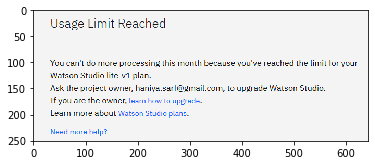

In [77]:
plt.imshow(img) 

Lets get a more clear image 


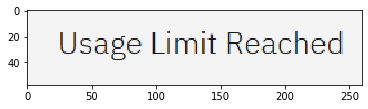

In [79]:
img1 = mpimg.imread('IBM1.PNG')
plt.imshow(img1)

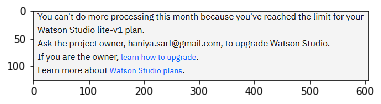

In [80]:
img2 = mpimg.imread('IBM2.PNG')
plt.imshow(img2)

As you can see, I cannot use IBM Watson Studio. **This was shocking** because in May, 2020 I only used Watson Studio for the last two units in the IBM Data Science Certificate. 

## Challenge 2 
### Problem:
The postcodes and locations of empty houses in Plymouth, Uk was provided by the Government for 2017. A new couple wants to move into Plymouth but they are not sure which neighborhood to pick. They want a neighborhood that is near schools and cafes. They have asked the data analyst to cluster neighborhoods based on the empty house data. This is relevant to the couple because buying a house is a big financial investment for them and the target auidence are the couple and their child - they want a vibrant and busy neighborhood to live in. 

### Data:
The data was retrived from the following sources:
* The UK Government website provided the data of empty homes in Plymount for 2017 (https://data.gov.uk/dataset/93d24df3-a255-4499-9165-d23a2f6632ba/location-of-empty-homes-in-plymouth). The features that can be extracted from this data are Postal Code, Longitude and Latitude.
* Foursquare will help in exploring and clustering the neighborhoods in Plymouth. The featues being used are the explore and seach functions which are linked to API.

### Data Cleaning:

The data was in a csv file so I transfered that data into a dataframe. 

In [130]:
import pandas as pd
import numpy as np
dfen = pd.read_csv('postcodesandlocationsofemptyhomesinplymouth2017.csv', index_col=0)
dfen

,Latitude,Longitude,Easting,Northing
Address,,,,
PL1 1RQ,50.371112,-4.146802,247431,54560
PL1 1SJ,50.372885,-4.146769,247439,54757
PL1 2AH,50.369410,-4.139103,247973,54355
PL1 2AH,50.369410,-4.139103,247973,54355
PL1 2AZ,50.368606,-4.141738,247783,54271
PL1 2AZ,50.368606,-4.141738,247783,54271
PL1 2BE,50.365639,-4.146062,247466,53950
PL1 2BE,50.365639,-4.146062,247466,53950
PL1 2HT,50.367516,-4.140846,247843,54148


In [97]:
dfen.shape

(753, 4)

In [98]:
dfen = dfen.dropna(how='any')    #to drop if any value in the row has a nan
dfen.head()

,Latitude,Longitude,Easting,Northing
Address,,,,
PL1 1RQ,50.371112,-4.146802,247431,54560
PL1 1SJ,50.372885,-4.146769,247439,54757
PL1 2AH,50.369410,-4.139103,247973,54355
PL1 2AH,50.369410,-4.139103,247973,54355
PL1 2AZ,50.368606,-4.141738,247783,54271


In [99]:
dfen.shape

(753, 4)

In [113]:
address = 'Plymouth, UK'

geolocator = Nominatim(user_agent="plymouth_explorer")
location1 = geolocator.geocode(address)
latitude1 = location.latitude
longitude1 = location.longitude
print('The geograpical coordinate of Plymouth are {}, {}.'.format(latitude1, longitude1))

The geograpical coordinate of Plymouth are 50.3712659, -4.1425658.


In [114]:
# create map of Toronto using latitude and longitude values
map_plymouth = folium.Map(location=[latitude, longitude], zoom_start=10)

map_plymouth

In [116]:
# add markers to map
for lat, lng in zip(dfen['Latitude'], dfen['Longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_plymouth)  
    
map_plymouth

In [117]:
# @hidden_cell
CLIENT_ID = 'TK0NH1BZDUPROZINPTDCBBTNV5JTVHF300LGRJX30CTT0UOP' # your Foursquare ID
CLIENT_SECRET = 'MILWYGQJEFVEPQKPLOIF4XZST5TJDNCESE1RA0DL00GXOBKE' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [118]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 100 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)

In [119]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ec4646d77af03001bba6eb8'},
 'response': {'headerLocation': 'City Centre',
  'headerFullLocation': 'City Centre, Plymouth',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 8,
  'suggestedBounds': {'ne': {'lat': 50.3721659009, 'lng': -4.141157355421179},
   'sw': {'lat': 50.370365899099994, 'lng': -4.14397424457882}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d9d994b48b6224bca55279f',
       'name': 'Barista Brothers',
       'location': {'address': '135-137 Armada Way',
        'lat': 50.37204589514141,
        'lng': -4.142607649250405,
        'labeledLatLngs': [{'label': 'display',
          'lat': 50.37204589514141,
          'lng': -4.142607649250405}],
        'distance': 86,
        'postalCode': 'PL1 1H

In [120]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [121]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

C:\Users\haniya\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Barista Brothers,Coffee Shop,50.372046,-4.142608
1,Costa Coffee,Coffee Shop,50.371255,-4.142699
2,Waterstones,Bookstore,50.371206,-4.143662
3,Caffè Nero,Coffee Shop,50.370986,-4.142394
4,House of Fraser,Department Store,50.370915,-4.141872


In [122]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    

    return(nearby_venues)

I managed to cluser the neighborhoods based on the postcode and location of these empty houses in Plymouth but this is when I got the IBM Message (but as I mentioned before and showed the IBM Usage limit Images), "You have reached the monthly usuage limit reach please upgrade Watson Studio.". This means that I need to pay to use Watson Studio. **This is crazy!** This month, May 2020, I only used IBM Watson to do the last two units of the IBM Data Science Cert. 
So now I am really stuck. How am I supposed to submit the assignment this week? This is when I got Anaconda on my laptop and began using Jupyter Notebooks on my desktop. 
Using Jupyter is a new experience and I am experiencing new sets of challenges.

In order to view the maps I needed to work with Jupyter Lab and learn a bunch new techniques to do that.

I decided to change how I would approach this Assignment.

## Challenge 3 
### Problem:
There are two datasets. One is about the affordable houses built in Plymouth, UK from 2002-2015. The second set is empty houses brought back into use in 2006-2015 in Plymouth, UK. The UK Government wants to access whether there is a positive correlation between affordable houses built in Plymouth and empty houses brought back to use. This is part of a research study they are doing to improve housing in Plymouth, UK. The UK Government cares about this problem because the results can help them improve the Plymouth housing situatiob by providing a new perspective. The target audience are Plymouth residents and new people moving in; they care about affordable houses and new houses in the city. 

### Data:
The data was retrived from the following sources:
* The UK Government website provided the data for affordable houses built in Plymounth for 2002-2015 (https://data.gov.uk/dataset/d6fc8a4f-d332-432a-aefd-f2d5e9bd0d3d/affordable-houses-built). The features that can be extracted from this data are Year and how many affordbale houses were built each year.
* The UK Government website provided the data for empty houses brought back into use in Plymounth for 2006-2015 (https://data.gov.uk/dataset/149ca8b6-c39e-4699-abb4-ad8f7e61f016/empty-homes-brought-back-into-use). The features that can be extracted from this data are Year and how many empty houses were brought back for use each year.

### Data Cleaning:

The data was in a csv file so I transfered that data into a dataframe. 


In [138]:
empty = pd.read_csv('EmptyHousesBroughtBack.csv')
empty

,Year,Number of Empty Homes Brought back into use
0,2007,71
1,2008,77
2,2009,84
3,2010,92
4,2011,71
5,2012,95
6,2013,104
7,2014,85
8,2015,68


In [139]:
afford = pd.read_csv('affordablehousing.csv')
afford

,Year,Number of Afforadable Houses Built in Plymouth
0,2003,166
1,2004,67
2,2005,163
3,2006,154
4,2007,252
5,2008,216
6,2009,290
7,2010,335
8,2011,368
9,2012,276


In [140]:
df_col = pd.concat([empty, afford], axis=1)

df_col

,Year,Number of Empty Homes Brought back into use,Year,Number of Afforadable Houses Built in Plymouth
0,2007.0,71.0,2003,166
1,2008.0,77.0,2004,67
2,2009.0,84.0,2005,163
3,2010.0,92.0,2006,154
4,2011.0,71.0,2007,252
5,2012.0,95.0,2008,216
6,2013.0,104.0,2009,290
7,2014.0,85.0,2010,335
8,2015.0,68.0,2011,368
9,NaN,NaN,2012,276


In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

(0, 383.36175609598524)

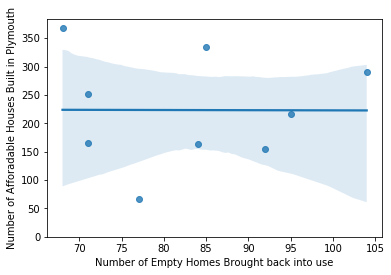

In [141]:
sns.regplot(x="Number of Empty Homes Brought back into use", y="Number of Afforadable Houses Built in Plymouth", data=df_col)
plt.ylim(0,)

(0, 109.23700057054268)

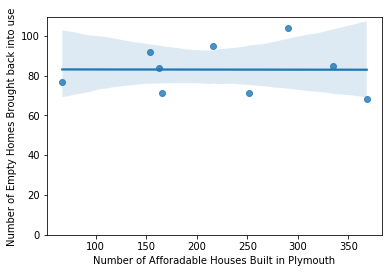

In [142]:
sns.regplot(x="Number of Afforadable Houses Built in Plymouth", y="Number of Empty Homes Brought back into use", data=df_col)
plt.ylim(0,)

The line is horizontal meaning there is no linear relationship between the two variables. It is clear that there is no correlation between number of affordable houses built in Plymouth and number of empty homes brought back into use in Plymouth.

(0, 114.92082373789871)

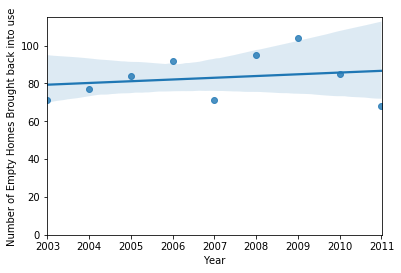

In [143]:
sns.regplot(x="Year", y="Number of Empty Homes Brought back into use", data=df_col)
plt.ylim(0,)

(0, 461.82294753407365)

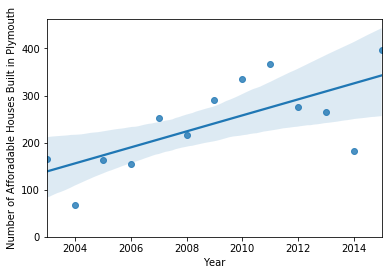

In [145]:
sns.regplot(x="Year", y="Number of Afforadable Houses Built in Plymouth", data=df_col)
plt.ylim(0,)

There is a very slight positive correlation between number of empty houses brought back to use and the year. However, when looking at number of affordable houses built in Plymouth and the year, it is clear that there is a moderate positive correlation. 

# Results

In the first challenge the Australian postcodes and suburb names were being used for Western Australia and New South Wales States to analyze and cluster the neighborhoods in Perth and Canberra. When it came to cluster everything, it became clear something was wrong with the table in the URL. 

In order to confirm this hypothesis, a new dataset was found. This was the postal code and location of empty houses in Plymouth, UK. When this dataset was used, everything worked perfectly and the clustering was successful. This is when the IBM Watson Studio message came. The message said that this month's usuage limit had been reached and I could not use Watson Studio. This was shocking for me because I had only worked on the last two units for the IBM Data Science Cert. I was frustrated because I could not submit that work.

This is when I got Anaconda and used Jupyter Notebooks there. In order to display the grapghs I needed Jupyter Lab, this is when I decided to change the direction.

This time I decided to do data analysis through the correlation coefficient. It became clear that there was no linear relationship and  correlation between empty houses brought back into use in Plymouth and the number of affordable houses built in Plymouth.
There is a positive correlation between the number of affordable houses built and the years. This means as the years increaase, more affordable houses are built. This is great news for the Plymouth council and the people living in the city. 

# Discussion 
This data analysis and visualization is great for the Plymouth council. For example, when people see that more affordable houses are being built as the years increase, they will become happy and faith that situations can become better will be restored. This is how the council can build strong trust with their residents. 

The neighborhood clustering can be a game changer. It would be nice to cluser neighborhoods based on rental homes and houses for sale. This allows people to see which neighborhoods have what sort of facilities. A service could be provided where people specify whether they want their home to be near schools, cafes, pubs, parks, etc. and this can help with the house search. 

Neighborhoods could be clustered based on school locations, park locations, crime hotspot locations, etc. All these aspects create better awareness and can help the Plymouth council when it comes to city structure planning and city safety.

# Conclusion
There are many ways Plymouth Council can improve their city and the lives of their residents. This is one example of how data analysis can change and transform decision-making and awareness. 

There are other datasets such as crime, health, grade, climate, etc. that Plymouth has. The next step is to clean and visualize these datasets and see how new information and insights can be gained. Perhaps a problem can be viewed from a new angle. 
